[View in Colaboratory](https://colab.research.google.com/github/scubamut/backtests/blob/master/BACKTEST_STEP_BY_STEP.ipynb)

In [1]:
from __future__ import print_function
from IPython.utils.path import get_ipython_dir
print(get_ipython().profile_dir.location)

/content/.ipython/profile_default


In [2]:
!pip install git+https://github.com/pydata/pandas-datareader.git

  Cloning https://github.com/pydata/pandas-datareader.git to /tmp/pip-req-build-bn7w374h
  Running setup.py bdist_wheel for pandas-datareader ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-50m1xzys/wheels/5f/4c/e3/f9e4e92cb4498744a91d53d37b840fb1959c286bf660740040
Successfully built pandas-datareader
  Found existing installation: pandas-datareader 0.6.0
    Uninstalling pandas-datareader-0.6.0:
      Successfully uninstalled pandas-datareader-0.6.0


In [3]:
!pip install git+https://github.com/scubamut/fintools.git
!pip install cvxopt
!pip install pyfolio
!pip install ffn
!pip install itable

  Cloning https://github.com/scubamut/fintools.git to /tmp/pip-req-build-88sr5jmo
  Running setup.py bdist_wheel for fintools ... - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-wocy0pga/wheels/31/8c/f2/b804e06272798f0f915e278c6e44fe46c927321835e506c256
Successfully built fintools


In [4]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import itable
import ffn

In [5]:
from fintools.Parameters import Parameters
from fintools.set_start_end import set_start_end
from fintools.get_yahoo_prices import get_yahoo_prices
from fintools.compute_weights_RS_DM import compute_weights_RS_DM
from fintools.compute_weights_PMA import compute_weights_PMA
from fintools.endpoints import endpoints
from fintools.backtest import backtest
from fintools.monthly_return_table import monthly_return_table
from fintools.show_return_table import show_return_table

# STEP BY STEP BACKTEST

In [7]:
symbols =['VCVSX','VWINX','VWEHX','VGHCX','VFIIX','VWAHX','FGOVX','FFXSX']
cash_proxy = 'VUSTX'
risk_free = 0


# get data
tickers = symbols.copy()
if cash_proxy != 'CASHX' :
    tickers = list(set(tickers + [cash_proxy]))
if isinstance(risk_free, str) :
    tickers = list(set(tickers + [risk_free]))



In [8]:
# from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2018-06-10'

In [9]:
# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '1986-01-01'
start_date = '2000-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

In [10]:
# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = web.DataReader(tickers, data_source, start_date, end_date)

panel_data[:5]

Attributes  High                                                               \
Symbols    FFXSX FGOVX  VCVSX VFIIX       VGHCX VUSTX  VWAHX VWEHX      VWINX   
Date                                                                            
2000-01-03  9.04  9.30  13.45  9.83   94.699997  9.58  10.01  7.37  18.600000   
2000-01-04  9.05  9.33  13.03  9.83   91.629997  9.65  10.01  7.35  18.520000   
2000-01-05  9.04  9.29  12.97  9.78   92.900002  9.56   9.99  7.33  18.610001   
2000-01-06  9.05  9.32  12.89  9.81   95.320000  9.63   9.99  7.33  18.820000   
2000-01-07  9.05  9.34  13.09  9.83  100.199997  9.67  10.00  7.33  19.010000   

Attributes   Low    ...    Volume Adj Close                                \
Symbols    FFXSX    ...     VWINX     FFXSX     FGOVX     VCVSX     VFIIX   
Date                ...                                                     
2000-01-03  9.04    ...       0.0  5.496316  4.483580  4.418780  4.349412   
2000-01-04  9.05    ...       0.0  5.502399  4.498044  4.280795  4.349412   
2000-01-05  9.04    ...       0.0  5.496316  4.478763  4.261084  4.327292   
2000-01-06  9.05    ...       0.0  5.502399  4.493221  4.234804  4.340561   
2000-01-07  9.05    ...       0.0  5.502399  4.502867  4.300507  4.349412   

Attributes                                                     
Symbols         VGHCX     VUSTX     VWAHX     VWEHX     VWINX  
Date                                                           
2000-01-03  26.726952  3.438077  4.379773  2.032249  7.092514  
2000-01-04  25.860510  3.463202  4.379773  2.026736  7.062006  
2000-01-05  26.218946  3.430904  4.371021  2.021220  7.096326  
2000-01-06  26.901941  3.456023  4.371021  2.021220  7.176404  
2000-01-07  28.279205  3.470379  4.375402  2.021220  7.248850  

[5 rows x 54 columns]

In [11]:
data = panel_data['Adj Close'].sort_index(ascending=True)
data[:5]

Symbols,FFXSX,FGOVX,VCVSX,VFIIX,VGHCX,VUSTX,VWAHX,VWEHX,VWINX
Date,,,,,,,,,
2000-01-03,5.496316,4.483580,4.418780,4.349412,26.726952,3.438077,4.379773,2.032249,7.092514
2000-01-04,5.502399,4.498044,4.280795,4.349412,25.860510,3.463202,4.379773,2.026736,7.062006
2000-01-05,5.496316,4.478763,4.261084,4.327292,26.218946,3.430904,4.371021,2.021220,7.096326
2000-01-06,5.502399,4.493221,4.234804,4.340561,26.901941,3.456023,4.371021,2.021220,7.176404
2000-01-07,5.502399,4.502867,4.300507,4.349412,28.279205,3.470379,4.375402,2.021220,7.248850


In [12]:
prices = data.copy().dropna()
prices[:5]

Symbols,FFXSX,FGOVX,VCVSX,VFIIX,VGHCX,VUSTX,VWAHX,VWEHX,VWINX
Date,,,,,,,,,
2000-01-03,5.496316,4.483580,4.418780,4.349412,26.726952,3.438077,4.379773,2.032249,7.092514
2000-01-04,5.502399,4.498044,4.280795,4.349412,25.860510,3.463202,4.379773,2.026736,7.062006
2000-01-05,5.496316,4.478763,4.261084,4.327292,26.218946,3.430904,4.371021,2.021220,7.096326
2000-01-06,5.502399,4.493221,4.234804,4.340561,26.901941,3.456023,4.371021,2.021220,7.176404
2000-01-07,5.502399,4.502867,4.300507,4.349412,28.279205,3.470379,4.375402,2.021220,7.248850


In [13]:
end_points = endpoints(period='M', trading_days=prices.index)
prices_m = prices.loc[end_points]

rs_lookback = 1
risk_lookback = 1
n_top = 3

In [14]:
print(symbols)

['VCVSX', 'VWINX', 'VWEHX', 'VGHCX', 'VFIIX', 'VWAHX', 'FGOVX', 'FFXSX']


In [15]:
returns = prices_m[symbols].pct_change(rs_lookback)[rs_lookback:]
absolute_momentum_rule = returns > 0
if isinstance(risk_free, int) :
    excess_returns = returns
else :
    risk_free_returns =  prices_m[risk_free].pct_change(rs_lookback)[rs_lookback:]
    excess_returns = returns.subtract(risk_free_returns, axis=0).dropna()
    
rebalance_dates = excess_returns.index.join(absolute_momentum_rule.index, how='inner')

In [16]:
returns[:3]

Symbols,VCVSX,VWINX,VWEHX,VGHCX,VFIIX,VWAHX,FGOVX,FFXSX
Date,,,,,,,,
2000-02-29,0.105874,-0.030011,0.001412,0.021246,0.014156,0.014916,0.013707,0.007472
2000-03-31,0.006971,0.056018,-0.009069,0.082158,0.017121,0.023099,0.013908,0.007791
2000-04-28,-0.049836,0.001592,0.007499,0.023139,-0.001285,-0.005105,-0.002196,0.002126


In [17]:
# relative strength ranking               
ranked = excess_returns.loc[rebalance_dates][symbols].rank(ascending=False, axis=1, method='dense')
# elligibility rule - top n_top ranked securities
elligible = ranked[ranked<=n_top] > 0
elligible[:3]

Symbols,VCVSX,VWINX,VWEHX,VGHCX,VFIIX,VWAHX,FGOVX,FFXSX
Date,,,,,,,,
2000-02-29,True,False,False,True,False,True,False,False
2000-03-31,False,True,False,True,False,True,False,False
2000-04-28,False,False,True,True,False,False,False,True


In [18]:
# equal weight allocations
elligible = elligible.multiply(1./elligible.sum(1), axis=0)
elligible[:3]

Symbols,VCVSX,VWINX,VWEHX,VGHCX,VFIIX,VWAHX,FGOVX,FFXSX
Date,,,,,,,,
2000-02-29,0.333333,0.000000,0.000000,0.333333,0.0,0.333333,0.0,0.000000
2000-03-31,0.000000,0.333333,0.000000,0.333333,0.0,0.333333,0.0,0.000000
2000-04-28,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.0,0.333333


In [19]:
prices.columns

Index(['FFXSX', 'FGOVX', 'VCVSX', 'VFIIX', 'VGHCX', 'VUSTX', 'VWAHX', 'VWEHX',
       'VWINX'],
      dtype='object', name='Symbols')

In [20]:
cash_proxy

'VUSTX'

In [21]:
# downside protection
weights = pd.DataFrame(0.,index=elligible.index, columns=prices.columns)
if cash_proxy == 'CASHX' :
    weights[cash_proxy] = 0
    prices[cash_proxy] = 1.
weights[symbols] = (elligible * absolute_momentum_rule).dropna() 
weights[:10]

Symbols,FFXSX,FGOVX,VCVSX,VFIIX,VGHCX,VUSTX,VWAHX,VWEHX,VWINX
Date,,,,,,,,,
2000-02-29,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.333333,0.000000,0.000000
2000-03-31,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.333333,0.000000,0.333333
2000-04-28,0.333333,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.333333,0.000000
2000-05-31,0.000000,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.000000,0.333333
2000-06-30,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.333333,0.000000,0.000000
2000-07-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.333333,0.333333
2000-08-31,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.000000,0.000000,0.333333
2000-09-29,0.000000,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.000000,0.333333
2000-10-31,0.000000,0.333333,0.000000,0.000000,0.333333,0.0,0.000000,0.000000,0.333333


In [22]:
weights[cash_proxy] += 1 - weights[symbols].sum(axis=1)
weights[:10]

Symbols,FFXSX,FGOVX,VCVSX,VFIIX,VGHCX,VUSTX,VWAHX,VWEHX,VWINX
Date,,,,,,,,,
2000-02-29,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.333333,0.000000,0.000000
2000-03-31,0.000000,0.000000,0.000000,0.000000,0.333333,0.0,0.333333,0.000000,0.333333
2000-04-28,0.333333,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,0.333333,0.000000
2000-05-31,0.000000,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.000000,0.333333
2000-06-30,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.333333,0.000000,0.000000
2000-07-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.333333,0.333333
2000-08-31,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.000000,0.000000,0.333333
2000-09-29,0.000000,0.000000,0.000000,0.333333,0.333333,0.0,0.000000,0.000000,0.333333
2000-10-31,0.000000,0.333333,0.000000,0.000000,0.333333,0.0,0.000000,0.000000,0.333333


In [23]:
date = rebalance_dates[0]
weights.loc[date]

Symbols
FFXSX    0.000000
FGOVX    0.000000
VCVSX    0.333333
VFIIX    0.000000
VGHCX    0.333333
VUSTX    0.000000
VWAHX    0.333333
VWEHX    0.000000
VWINX    0.000000
Name: 2000-02-29 00:00:00, dtype: float64

In [24]:
prices.loc[date]

Symbols
FFXSX     5.543029
FGOVX     4.564147
VCVSX     5.010142
VFIIX     4.382757
VGHCX    28.488045
VUSTX     3.617873
VWAHX     4.405204
VWEHX     2.025008
VWINX     6.901852
Name: 2000-02-29 00:00:00, dtype: float64

In [25]:
(10000 * weights.loc[date] / prices.loc[date]).astype(int)

Symbols
FFXSX      0
FGOVX      0
VCVSX    665
VFIIX      0
VGHCX    117
VUSTX      0
VWAHX    756
VWEHX      0
VWINX      0
Name: 2000-02-29 00:00:00, dtype: int64

FIRST BUY DATE = 2000-02-29 00:00:00



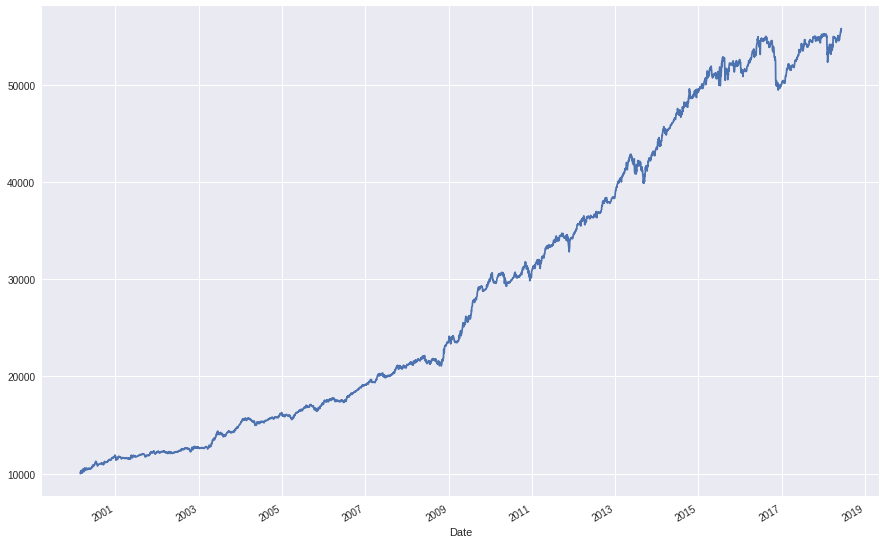

In [26]:
# backtest

p_value, p_holdings, p_weights = backtest(prices, weights, 10000., offset=0, commission=10.)

p_value.plot(figsize=(15,10), grid=True)

In [28]:
p_weights.loc[rebalance_dates][:5]

Symbols,FFXSX,FGOVX,VCVSX,VFIIX,VGHCX,VUSTX,VWAHX,VWEHX,VWINX
Date,,,,,,,,,
2000-02-29,0.000000,0.0,0.333333,0.000000,0.333333,0.0,0.333333,0.000000,0.000000
2000-03-31,0.000000,0.0,0.000000,0.000000,0.333333,0.0,0.333333,0.000000,0.333333
2000-04-28,0.333333,0.0,0.000000,0.000000,0.333333,0.0,0.000000,0.333333,0.000000
2000-05-31,0.000000,0.0,0.000000,0.333333,0.333333,0.0,0.000000,0.000000,0.333333
2000-06-30,0.000000,0.0,0.333333,0.000000,0.333333,0.0,0.333333,0.000000,0.000000
